# Loading data 💽

In [1]:
# Dependencies list
import pandas as pd
import numpy as np

In [2]:
# Data import
df = pd.read_csv("data/dataset.csv", sep='\t')

/var/folders/_p/1rwpv82j3ql7l45v9wfz7sm40000gn/T/ipykernel_73273/2195280780.py:2: DtypeWarning: Columns (0,9,15,24,25,29,30,31,33,51,65,70,87,148) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/dataset.csv", sep='\t')


# Data processing ⚙️

In [58]:
def remove_outliers_using_zscore(df, threshold=2):
    z_scores = np.abs((df - df.mean()) / df.std())
    return df[(z_scores < threshold).all(axis=1)]

In [59]:
# Ensure the columns are in the correct numeric data type
numeric_columns = ['ingredients_text', 
                   'allergens', 
                   'packaging', 
                   'saturated-fat_100g', 
                   'fat_100g', 
                   'sugars_100g', 
                   'carbohydrates_100g', 
                   'proteins_100g', 
                   'energy_100g', 
                   'additives_n', 
                   'labels']

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [87]:
# Columns to keep
columns = ["energy-kcal_100g",
           "nutriscore_grade",
           "fat_100g",
           "saturated-fat_100g", 
           "carbohydrates_100g",
           "sugars_100g", 
           "proteins_100g",
           "sodium_100g", 
           "fiber_100g",
          ]
df_filtred = df.loc[:,columns]

In [88]:
# Statistical analyse
df_filtred.describe()

energy-kcal_100g      fat_100g  saturated-fat_100g  carbohydrates_100g   
count      2.186655e+06  2.218910e+06        2.173594e+06        2.219171e+06  \
mean       2.399667e+39  4.957390e+07        6.535089e+00        2.857651e+01   
std        3.548469e+42  7.384530e+10        2.057039e+03        1.092577e+02   
min       -5.300000e+01 -5.000000e+00        0.000000e+00       -1.000000e+00   
25%        1.010000e+02  8.000000e-01        1.000000e-01        3.570000e+00   
50%        2.590000e+02  7.000000e+00        1.785714e+00        1.580000e+01   
75%        4.000000e+02  2.110000e+01        7.000000e+00        5.300000e+01   
max        5.247243e+45  1.100000e+14        3.030330e+06        9.999900e+04   

        sugars_100g  proteins_100g   sodium_100g    fiber_100g  
count  2.199800e+06   2.221281e+06  1.985003e+06  9.775360e+05  
mean   4.545869e+07   9.155680e+00  8.681520e+01  1.003879e+41  
std    6.742305e+10   8.400556e+01  7.573230e+04  9.925390e+43  
min   -1.700000e+01  -4.600000e+01  0.000000e+00 -6.700000e+00  
25%    5.000000e-01   1.300000e+00  4.000000e-02  0.000000e+00  
50%    3.530000e+00   6.000000e+00  2.400000e-01  1.600000e+00  
75%    1.700000e+01   1.257143e+01  5.625000e-01  3.800000e+00  
max    1.000000e+14   1.000000e+05  9.046956e+07  9.813275e+46

## Outlier processing 

In [89]:
def remove_outliers_using_zscore(df, threshold=2):
    # Select only numeric columns
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    
    # Calculate Z-scores for numeric columns
    z_scores = np.abs((df[numeric_columns] - df[numeric_columns].mean()) / df[numeric_columns].std())
    
    # Filter out rows with any Z-score above the threshold
    return df[(z_scores < threshold).all(axis=1)]

def remove_invalid_nutritional_values(df, max_value=90, exclude_columns=None):
    # If exclude_columns is not provided, use an empty list
    if exclude_columns is None:
        exclude_columns = []

    # Select only numeric columns and remove excluded columns from the selection
    numeric_columns = df.select_dtypes(include=[np.number]).columns.difference(exclude_columns)
    
    # Filter out rows with any numeric value above the maximum in the selected columns
    return df[(df[numeric_columns] <= max_value).all(axis=1)]

# Remove invalid values, excluding the 'NutrientD' column
df_filtred = remove_invalid_nutritional_values(df_filtred, exclude_columns=['energy-kcal_100g'])

In [90]:
df_filtred.describe()

energy-kcal_100g       fat_100g  saturated-fat_100g   
count     810079.000000  836345.000000       836345.000000  \
mean         275.524013      12.519508            4.435096   
std          626.609368      14.455883            6.581305   
min            0.000000       0.000000            0.000000   
25%          107.000000       1.010000            0.000000   
50%          273.000000       7.140000            1.700000   
75%          407.000000      20.000000            6.250000   
max       484000.000000      90.000000           90.000000   

       carbohydrates_100g    sugars_100g  proteins_100g    sodium_100g   
count       836345.000000  836345.000000  836345.000000  836345.000000  \
mean            31.487808      12.581508       8.638148       0.527240   
std             26.849042      17.275097       9.800941       1.904385   
min             -1.000000      -1.000000     -15.000000       0.000000   
25%              6.666667       0.900000       2.200000       0.042000   
50%             23.333333       4.000000       6.250000       0.248000   
75%             56.338028      18.750000      11.607143       0.520000   
max             90.000000      90.000000      90.000000      90.000000   

          fiber_100g  
count  836345.000000  
mean        3.221947  
std         5.636140  
min        -6.670000  
25%         0.000000  
50%         1.600000  
75%         3.700000  
max        90.000000

## Drop NaN values

In [91]:
df_filtred.dropna(inplace=True)

## Features Egeenering test

In [76]:
# Compute nutrient ratios
small_constant = 1e-10
df_filtred['fat_to_energy'] = df_filtred['fat_100g'] / (df_filtred['energy-kcal_100g'] + small_constant)
df_filtred['sugar_to_energy'] = df_filtred['sugars_100g'] / (df_filtred['energy-kcal_100g'] + small_constant)
df_filtred['protein_to_energy'] = df_filtred['proteins_100g'] / (df_filtred['energy-kcal_100g'] + small_constant)

KeyError: 'fat_100g'

## Data vizualisation

<Axes: >

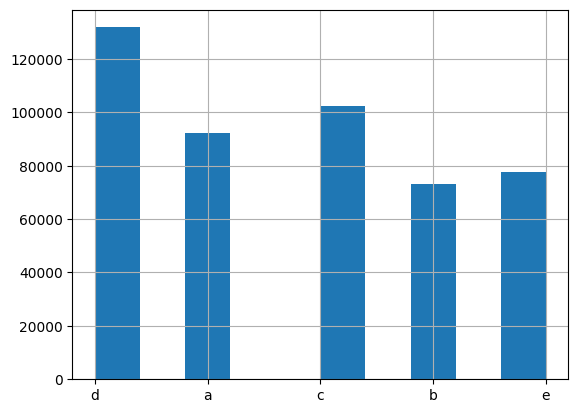

In [92]:
# Repartition class
df_filtred["nutriscore_grade"].hist()

# Machine Learning model 🤖

In [93]:
from sklearn.model_selection import train_test_split

# Split the dataset into X and y
#X = df_filtred.loc[:,["energy-kcal_100g", "fat_to_energy", "sugar_to_energy", "protein_to_energy", "sodium_100g", "fiber_100g"]]
X = df_filtred.drop(columns=['nutriscore_grade'])
y = df_filtred['nutriscore_grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [94]:
X_train

energy-kcal_100g  fat_100g  saturated-fat_100g  carbohydrates_100g   
2149768               0.0      0.00                0.00                0.00  \
1193172             228.0     11.30                2.70               15.70   
1513056             336.0      2.70                0.60               50.00   
54493               304.0      1.79                0.36               60.71   
2602388              39.0      0.30                0.20                5.10   
...                   ...       ...                 ...                 ...   
2722863             498.0     21.30                8.60               70.30   
671629               15.0      0.00                0.00                3.00   
34528               200.0     16.67               11.67                6.67   
2492952              86.0      0.10                0.00                0.00   
391248              400.0     14.29                5.71               62.86   

         sugars_100g  proteins_100g  sodium_100g  fiber_100g  
2149768         0.00           0.00        0.000         0.0  
1193172         1.70          15.20        0.416         1.3  
1513056         0.80          18.00        0.036        20.0  
54493           0.00           8.93        0.750         1.8  
2602388         5.10           4.00        0.060         0.0  
...              ...            ...          ...         ...  
2722863        33.40           5.60        0.448         1.2  
671629          2.00           0.00        0.000         0.0  
34528           6.67           3.33        0.150         0.0  
2492952         0.00           0.00        0.040         0.5  
391248         31.43           5.71        0.386         2.9  

[381690 rows x 8 columns]

## Pipeline 

In [95]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

# Define the pipeline with preprocessing and the classifier
pipeline = ImbPipeline([
    ("scaler", StandardScaler()),
    ("undersampler", RandomUnderSampler(random_state=42)),
    ("classifier", RandomForestClassifier(random_state=42))
])

# Define hyperparameters to be tuned
param_distributions = {
    "classifier__n_estimators": [10, 50, 100, 200],
    "classifier__max_depth": [5, 10, 20, 30],
    "classifier__min_samples_split": [2, 5, 10],
    "classifier__min_samples_leaf": [1, 2, 4],
}

# Tune hyperparameters using RandomizedSearchCV with cross-validation (5 folds)
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    cv=5,
    n_iter=20,
    scoring="accuracy",
    n_jobs=-1,
    random_state=42,
    verbose=2
)
random_search.fit(X_train, y_train)

# Get the best model
best_pipeline = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# Make predictions
y_pred = best_pipeline.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END classifier__max_depth=5, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=200; total time=  28.9s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=100; total time=  39.9s
[CV] END classifier__max_depth=5, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=10; total time=   2.7s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=10; total time=   5.4s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=100; total time=  29.1s
[CV] END classifier__max_depth=5, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=100; total time=  18.1s
[CV] END classifier__max_depth=20, classifier__m

[CV] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=50; total time=  19.6s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=100; total time=  39.4s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=50; total time=  21.4s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=100; total time=  29.4s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=200; total time= 1.0min
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=100; total time=  45.4s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=5, class

In [98]:
from joblib import dump

dump(best_pipeline, "model_nutriscore_v2.joblib")

['model_nutriscore_v2.joblib']

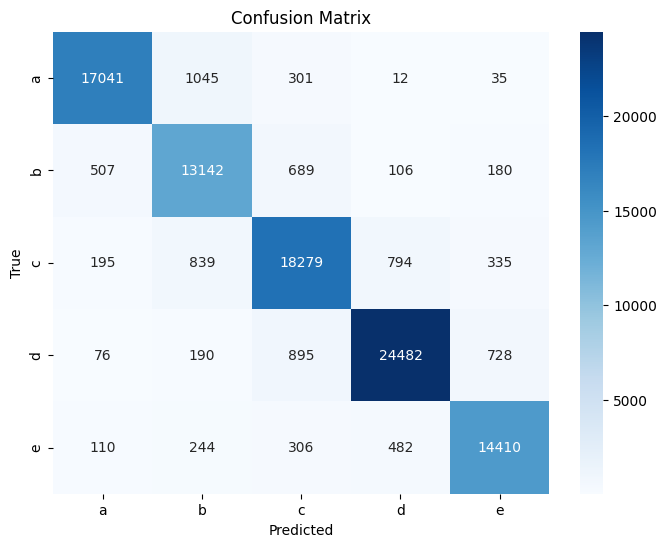

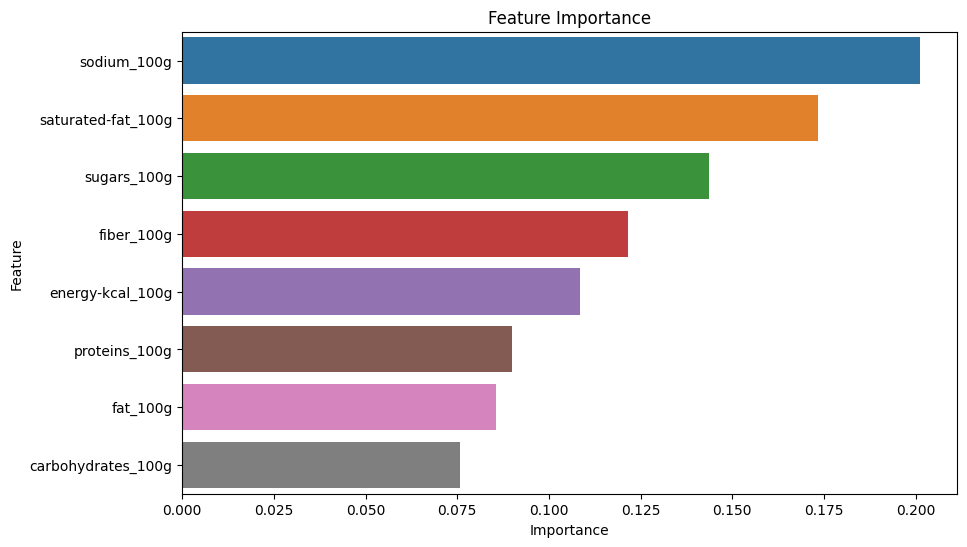

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve

def plot_confusion_matrix(y_true, y_pred, labels, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_df = pd.DataFrame(cm, index=labels, columns=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_df, annot=True, cmap="Blues", fmt="g")
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

plot_confusion_matrix(y_test, y_pred, labels=best_pipeline.named_steps["classifier"].classes_)

# Plot feature importance
def plot_feature_importance(importances, feature_names, title="Feature Importance"):
    feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
    feature_importance_df = feature_importance_df.sort_values("Importance", ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x="Importance", y="Feature", data=feature_importance_df, orient="h")
    plt.title(title)
    plt.show()

plot_feature_importance(best_pipeline.named_steps["classifier"].feature_importances_, X.columns)

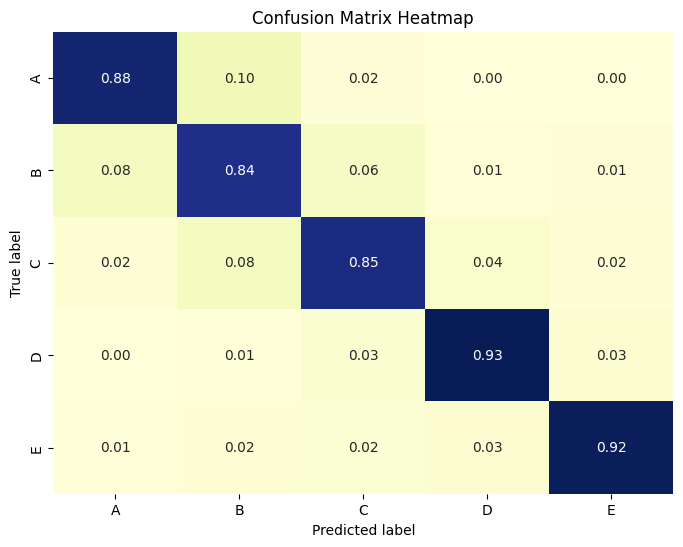

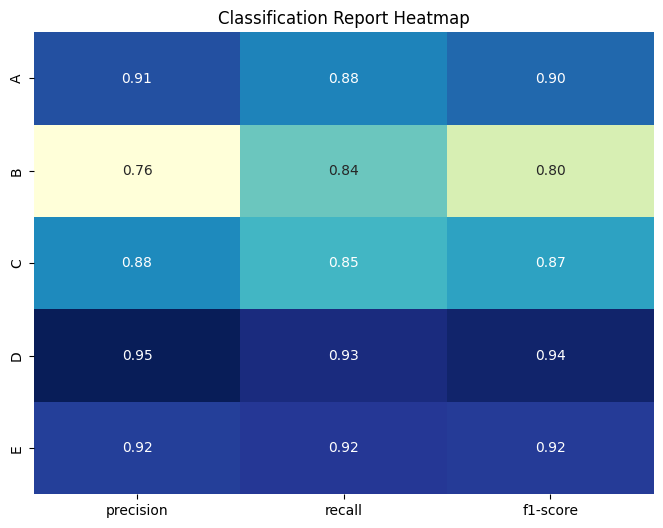

In [83]:
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, roc_auc_score

# Confusion matrix heatmap
def plot_heatmap_confusion_matrix(estimator, X_test, y_test, labels):
    y_pred = estimator.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(cm_normalized, annot=True, cmap="YlGnBu", xticklabels=labels, yticklabels=labels, cbar=False, fmt=".2f")
    plt.title("Confusion Matrix Heatmap")
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.show()
    
# Classification report heatmap
def plot_classification_report_heatmap(y_test, y_pred, labels):
    report = classification_report(y_test, y_pred, output_dict=True, target_names=labels)
    report_df = pd.DataFrame(report).transpose()
    report_df = report_df.iloc[:-3, :-1]  # Remove last 3 rows and last column

    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(report_df, annot=True, cmap="YlGnBu", cbar=False, fmt='.2f', ax=ax)
    plt.title("Classification Report Heatmap")
    plt.show()


    
# Make predictions
y_pred = best_pipeline.predict(X_test)

# Define class labels (replace this with your actual class labels)
class_labels = ['A', 'B', 'C', 'D', 'E']

# Visualize the results
plot_heatmap_confusion_matrix(best_pipeline, X_test, y_test, class_labels)
plot_classification_report_heatmap(y_test, y_pred, class_labels)


In [97]:
print("train : ", best_pipeline.score(X_train, y_train))
print("test : ", best_pipeline.score(X_test, y_test))

train :  0.9615971076004087
test :  0.9154396738731753


## XGBoost Pipeline

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y)

y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


# Create the XGBoost pipeline
xgb_pipeline = ImbPipeline([
    ("scaler", StandardScaler()),
    ("undersampler", RandomUnderSampler(random_state=42)),
    ('classifier', xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
])

# Define the hyperparameters for GridSearchCV
xgb_param_grid = {
    'classifier__learning_rate': [0.01, 0.1, 0.3],
    'classifier__max_depth': [3, 5, 7],
    'classifier__n_estimators': [100, 200, 300],
    'classifier__subsample': [0.8, 1.0],
    'classifier__colsample_bytree': [0.8, 1.0],
}

# Perform GridSearchCV with the XGBoost pipeline
xgb_random_search = RandomizedSearchCV(
    xgb_pipeline,
    xgb_param_grid,
    n_iter=30,  # Number of random combinations to try
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
)
xgb_random_search.fit(X_train, y_train_encoded)


# Get the best pipeline
best_xgb_pipeline = xgb_random_search.best_estimator_

# Print the best hyperparameters
print("Best XGBoost hyperparameters: ", xgb_grid_search.best_params_)

# Evaluate the performance of the best XGBoost pipeline
xgb_train_accuracy = accuracy_score(y_train, label_encoder.inverse_transform(best_xgb_pipeline.predict(X_train)))
xgb_test_accuracy = accuracy_score(y_test, label_encoder.inverse_transform(best_xgb_pipeline.predict(X_test)))

print(f"XGBoost Train accuracy: {xgb_train_accuracy:.4f}")
print(f"XGBoost Test accuracy: {xgb_test_accuracy:.4f}")


In [ ]:
best_xgb_pipeline = xgb_random_search.best_estimator_

In [ ]:
# Print the best hyperparameters
print("Best XGBoost hyperparameters: ", xgb_random_search.best_params_)

# Evaluate the performance of the best XGBoost pipeline
xgb_train_accuracy = accuracy_score(y_train, label_encoder.inverse_transform(best_xgb_pipeline.predict(X_train)))
xgb_test_accuracy = accuracy_score(y_test, label_encoder.inverse_transform(best_xgb_pipeline.predict(X_test)))

print(f"XGBoost Train accuracy: {xgb_train_accuracy:.4f}")
print(f"XGBoost Test accuracy: {xgb_test_accuracy:.4f}")

## SVM model

In [ ]:
from sklearn.svm import SVC

# Define the pipeline with preprocessing, undersampling, and the SVM classifier
pipeline = ImbPipeline([
    ("scaler", StandardScaler()),
    ("undersampler", RandomUnderSampler(random_state=42)),
    ("classifier", SVC(random_state=42))
])

# Define hyperparameters to be tuned
param_distributions = {
    "classifier__C": [0.1, 1, 10, 100],
    "classifier__kernel": ["linear", "rbf", "sigmoid"],
    "classifier__gamma": ["scale", "auto"]
}

# Tune hyperparameters using RandomizedSearchCV with cross-validation (5 folds)
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    cv=5,
    n_iter=20,
    scoring="accuracy",
    n_jobs=-1,
    random_state=42,
    verbose=2
)
random_search.fit(X_train, y_train)

# Get the best model
best_pipeline = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# Make predictions
y_pred = best_pipeline.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
y_pred = best_pipeline.predict(X_test)